In [2]:
# import time
import numpy as np
import matplotlib.pyplot as pp
# import scipy.linalg as la

%matplotlib inline

data = np.loadtxt(open("applesOranges.csv","rb"), delimiter=",", skiprows=1)
# print data

X = data[:,:2]  # data points x_1, x_2
# print X
Y = data[:,2].astype(int)  # labels for X, this is NOT the y-axis!
# print Y

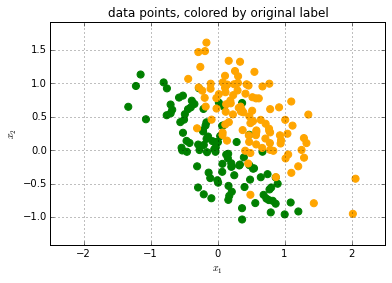

In [3]:
# 2.2 (a)
def plot_the_data(X,Y, title):
#     pp.figure(figsize=(9,9))
    colors = ["orange" if y == 1 else "green" for y in Y]
    pp.scatter(X[:,0], X[:,1], color=colors, s=50)
    pp.xlabel("$x_1$")
    pp.ylabel("$x_2$")
    pp.title(title)
    pp.axis("equal")
    pp.xlim([-2.5,2.5])
    pp.ylim([-1.5, 2])
    pp.grid()
    
plot_the_data(X,Y, "data points, colored by original label")

drawing some graphs for the exercise ...
found w = [[ 0.93969262  0.34202014]] and theta = 0.13567839196 , which yield accuracy 0.805


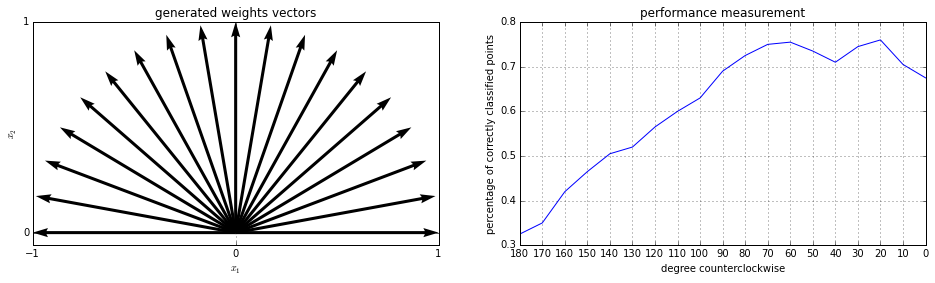

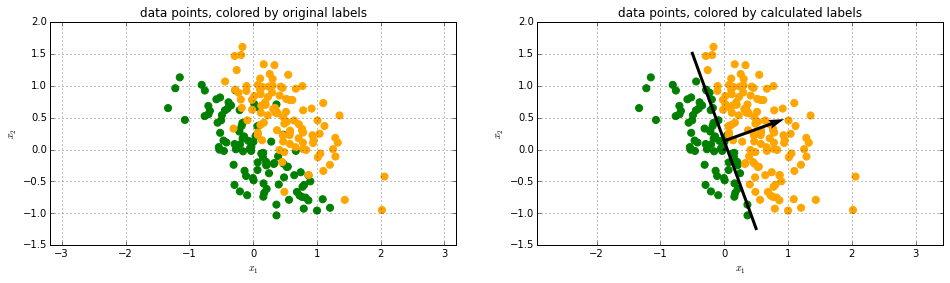

In [6]:
# 2.2
def norm(A):
    # normalize to ||w|| = 1
    return np.sqrt(np.sum(A**2,1))[:,np.newaxis]

def create_weights(k=19, plot=True):
    # create 19 2-dimensional vectors w
    # shape of W: (rows,columns) = (20,2)
    W = np.ndarray((k,2))
#     print np.hstack([W,norm(W)])
#     W = W/norm(W)
#     print np.hstack([W,norm(W)])
    degree_space = np.pi/(k-1)
    degree = 0
    for i in range(k):
        W[i,0], W[i,1] = (np.cos(degree), np.sin(degree))
        degree += degree_space

    # alternatively if you want to avoid the for-loop:
#     W = np.ndarray((19,2))
#     degree_space = np.pi/18
#     degrees = (np.arange(19)*degree_space)[:,np.newaxis]
#     W = np.hstack([np.cos(degrees), np.sin(degrees)])
#     print np.hstack([W, norm(W)])
    
    if plot:
        pp.figure(figsize=(16,4))
        pp.subplot(1,2,1)
#         pp.scatter(W[:,0], W[:,1])
        pp.grid()
        pp.quiver(np.zeros(k), np.zeros(k), W[:,0], W[:,1], angles="xy", scale_units="xy", scale=1)
        pp.title("generated weights vectors")
        pp.xlabel("$x_1$")
        pp.ylabel("$x_2$")
        pp.xticks([-1, 0, 1])
        pp.yticks([0, 1])
    
    return W

def measure_performance(X,Y,W, theta=0, plot=True):
    n = float(len(Y))
    Y_assigned = ((np.sign(X.dot(W.T) - theta)+1)/2)
#     print Y_assigned.T.shape
#     print Y
    correctly_classified = np.sum(Y_assigned.T == Y, 1)/n
    
    if plot:
        pp.subplot(1,2,2)
        pp.title("performance measurement")
        pp.xlabel("degree counterclockwise")
        pp.ylabel("percentage of correctly classified points")
        pp.plot((np.arange(19)*10), correctly_classified)
        pp.xticks((np.arange(19)*10))
        pp.xlim([180,0])
        pp.grid()
    
    index_w_best = np.argmax(correctly_classified)
#     print index_w_best, np.max(correctly_classified), correctly_classified[index_w_best]
    return index_w_best, correctly_classified[index_w_best], Y_assigned

def draw_vector(w, theta):
    w0, w1 = w
    pp.quiver([0,0],[theta,0],[w0,0], [w1,0], angles="xy", scale_units="xy", scale=1)

    # draw orthogonal line
    lineX = np.linspace(-0.5,0.5,2)
    lineY = (lineX*(-w0/w1)) + theta
    pp.plot(lineX, lineY, "k", linewidth=3)
    pp.axis('equal')

def draw_graphs_for_exercise(X,Y):
    W = create_weights()
    i_w, p, _ = measure_performance(X,Y,W)  # best index for w, associated percent of correctly classified points
    w = W[i_w,np.newaxis]
#     print w.shape
#     print w
    
    T = []
    for theta in np.linspace(-3, 3, 200):
        _, p, _ = measure_performance(X,Y,w, theta=theta, plot=False)
        T.append([theta,p])
    T = np.array(T)  # for pretty printing
#     print T
    i_theta = np.argmax(T[:,1])
    theta = T[i_theta,0]
#     print T[i_theta]

    i, p, Y_assigned = measure_performance(X,Y,w, theta=theta, plot=False)
    print "found w =", w, "and theta =", theta, ", which yield accuracy", p
    
    # plot the data
    pp.figure(figsize=(16,4))
    pp.subplot(1,2,1)
    plot_the_data(X,Y, "data points, colored by original labels")
    
    pp.subplot(1,2,2)
    plot_the_data(X,Y_assigned,"data points, colored by calculated labels")
    
    draw_vector(w[0,:], theta)

print "drawing some graphs for the exercise ..."
draw_graphs_for_exercise(X,Y)

searching for optimal values for w and theta, top results:
1 : a = 0.769369629451 w =( 0.718349350098 0.695682550603 ), theta = 0.30612244898  => p = 0.92
2 : a = 0.705255493663 w =( 0.761445958369 0.648228395308 ), theta = 0.30612244898  => p = 0.905
3 : a = 0.833483765238 w =( 0.672300890261 0.740277997075 ), theta = 0.30612244898  => p = 0.905


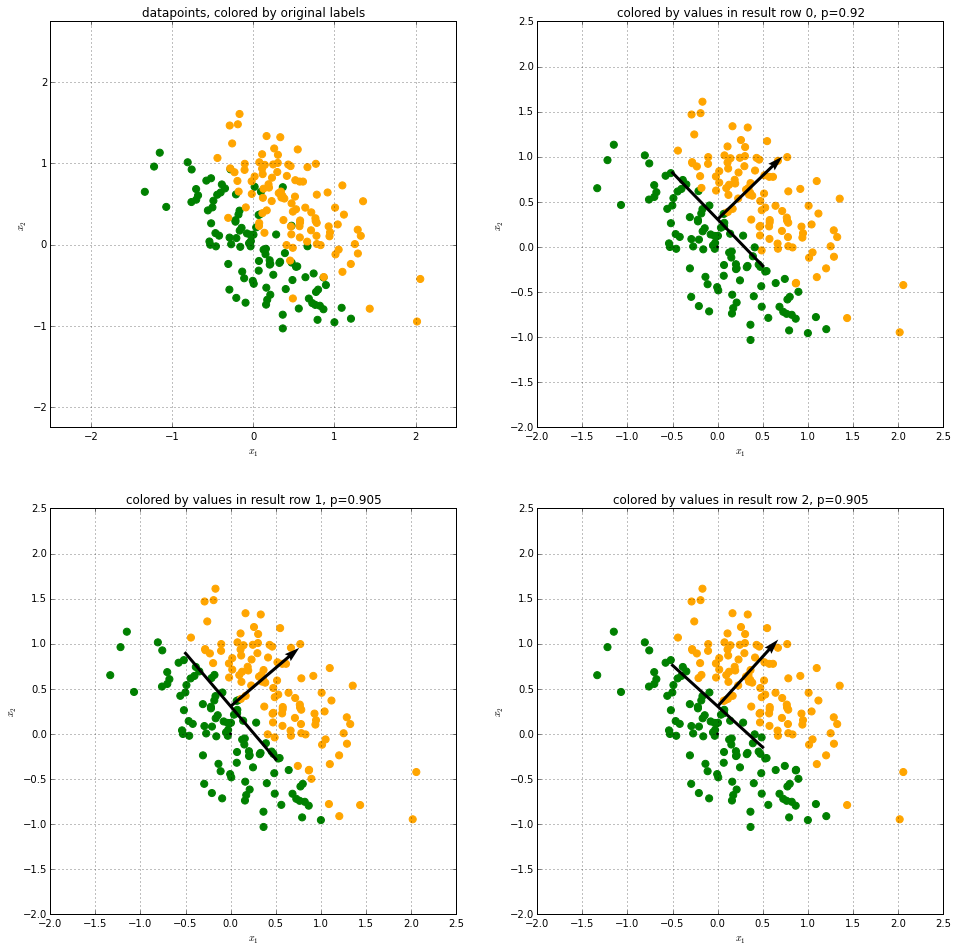

In [8]:
def find_parameters(X,Y):
    W = create_weights(50, plot=False)
    thetas = np.linspace(-3,3,50)
    
    T = []
    Ys = []
    for w in W:
        for theta in thetas:
            i, p, Y_assigned = measure_performance(X,Y,w[np.newaxis,:],theta=theta,plot=False)
            T.append([p, w[0], w[1], theta])
            Ys.append(Y_assigned)
    T = np.array(T)
#     print T.shape, len(Ys)
    
    T_sort = np.argsort(T[:,0])[::-1]  # [::-1] reverses the list, since sort functions sort by ascending values
    
    pp.figure(figsize=(16,16))
    pp.subplot(2,2,1)
    plot_the_data(X,Y,"datapoints, colored by original labels")
    for i in range(3):
        t = T_sort[i]
        p, w0, w1, theta = T[t]
        a = np.arccos(w0)
        print i+1, ": a =", a, "w =(", w0, w1, "), theta =", theta, " => p =", p
        
        pp.subplot(2,2,i+2)
        plot_the_data(X,Ys[t], "colored by values in result row " + str(i) + ", p=" + str(p))
        
        draw_vector([w0, w1], theta)

print "searching for optimal values for w and theta, top results:"
find_parameters(X,Y)